In [1]:
# prompt: Load CSV from local to colb

from google.colab import files
import pandas as pd

obj = files.upload()
df = pd.read_csv(list(obj.keys())[0])
df.head()

Saving Admission_Predict_A3.csv to Admission_Predict_A3 (2).csv


,Serial_No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
df = pd.DataFrame(df)
df

,Serial_No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.describe()

,Serial_No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
# Check for missing values
print(df.isnull().sum())

Serial_No.           0
GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance               0
dtype: int64


Hence no Null values

In [5]:
#Separate the DF into x and y (features and target) and drop the Serial No. Column

# Separate target 'Chance' into y
y = df['Chance']
x = df
# Create a copy of the dataframe without the target column 'Chance'
x = df.drop(['Chance', 'Serial_No.'], axis=1)

In [6]:
x

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [7]:
# prompt: bin the values of y in to low med and high

import numpy as np

# Assuming 'y' is your target variable
bins = np.percentile(y, [33, 67])  # Calculate 33rd and 67th percentiles

labels = ['Low', 'Medium', 'High']

y_binned = pd.cut(y, bins=[-float('inf'), bins[0], bins[1], float('inf')], labels=labels, include_lowest=True)

print(y_binned)

0        High
1      Medium
2      Medium
3        High
4         Low
        ...  
495      High
496      High
497      High
498    Medium
499      High
Name: Chance, Length: 500, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [8]:
# prompt: apply minmax scaler to every feature of x other than serial number

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

Splitting and scaling is done

Pre-processing done.

In [9]:
# prompt: Use the categorized target variable to perform Linear Discriminant Analysis (LDA) on the input
# features. fit transform

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

x_lda = lda.fit_transform(x, y_binned)

print(x_lda)

[[-3.38652256e+00  2.77016617e-01]
 [-1.22839480e+00  1.14121719e+00]
 [ 9.09789241e-01  2.31646103e-01]
 [-5.57545340e-01 -9.73167701e-01]
 [ 1.55544492e+00  6.68177465e-01]
 [-2.56023399e+00 -1.77839226e+00]
 [ 1.62825009e-01  5.73815192e-02]
 [ 2.14070292e+00  1.48709676e+00]
 [ 2.55190830e+00 -7.63858249e-01]
 [ 2.25983701e-01  5.31300210e-02]
 [-1.34901360e-01  1.25162810e+00]
 [-1.70669234e+00  5.57673575e-01]
 [-1.94752514e+00  4.80112951e-01]
 [ 8.56608163e-01 -1.81804404e+00]
 [ 8.20675877e-01 -1.21084722e+00]
 [ 1.12532986e+00 -5.86481533e-01]
 [ 1.97378950e-01 -2.28810601e-03]
 [ 7.69949498e-01 -2.72924425e-01]
 [-1.41334332e-01 -5.28877048e-01]
 [ 1.08119340e+00 -1.26735704e-01]
 [ 1.19355511e+00 -2.11625876e+00]
 [ 2.08761703e-01 -2.93249844e+00]
 [-3.10843950e+00 -2.01700305e-01]
 [-3.65676374e+00 -7.27314855e-01]
 [-3.70419932e+00 -1.54380796e+00]
 [-3.62815899e+00 -6.71896728e-01]
 [-5.95385509e-01 -8.57034659e-01]
 [ 2.77319591e+00 -5.37239180e-01]
 [ 4.44794627e+00  5

In [10]:
#3.3 to be done.

In [11]:
# prompt: Convert the LDA-transformed data into TensorFlow tensors.a

import tensorflow as tf

# Convert the LDA-transformed data to TensorFlow tensors
x_lda_tensor = tf.convert_to_tensor(x_lda, dtype=tf.float32)

print(x_lda_tensor)

tf.Tensor(
[[-3.38652253e+00  2.77016610e-01]
 [-1.22839475e+00  1.14121723e+00]
 [ 9.09789264e-01  2.31646106e-01]
 [-5.57545364e-01 -9.73167717e-01]
 [ 1.55544496e+00  6.68177485e-01]
 [-2.56023407e+00 -1.77839231e+00]
 [ 1.62825003e-01  5.73815182e-02]
 [ 2.14070296e+00  1.48709679e+00]
 [ 2.55190825e+00 -7.63858259e-01]
 [ 2.25983694e-01  5.31300195e-02]
 [-1.34901360e-01  1.25162816e+00]
 [-1.70669234e+00  5.57673573e-01]
 [-1.94752514e+00  4.80112940e-01]
 [ 8.56608152e-01 -1.81804407e+00]
 [ 8.20675850e-01 -1.21084726e+00]
 [ 1.12532985e+00 -5.86481512e-01]
 [ 1.97378948e-01 -2.28810590e-03]
 [ 7.69949496e-01 -2.72924423e-01]
 [-1.41334325e-01 -5.28877020e-01]
 [ 1.08119345e+00 -1.26735702e-01]
 [ 1.19355512e+00 -2.11625886e+00]
 [ 2.08761707e-01 -2.93249846e+00]
 [-3.10843945e+00 -2.01700300e-01]
 [-3.65676379e+00 -7.27314830e-01]
 [-3.70419931e+00 -1.54380798e+00]
 [-3.62815905e+00 -6.71896756e-01]
 [-5.95385492e-01 -8.57034683e-01]
 [ 2.77319598e+00 -5.37239194e-01]
 [ 4.4479

In [12]:
import tensorflow as tf

# Initialize parameters
W = tf.Variable(tf.random.normal([x_lda_tensor.shape[1], 1]))  # Weights (shape [2, 1] for 2 features)
b = tf.Variable(tf.random.normal([1]))  # Bias (shape [1])
learning_rate = 0.01
epochs = 1000

# Linear regression function
def linear_regression(X):
    return tf.matmul(X, W) + b

# Mean Squared Error (MSE) Loss function
def mse_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Ensure y has correct shape [500, 1]
y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)
y_tensor = tf.reshape(y_tensor, (-1, 1))  # Reshape y to [500, 1]

# Training loop without GradientTape
for epoch in range(epochs):
    # Forward pass: compute predictions
    y_pred = linear_regression(x_lda_tensor)

    # Compute loss
    loss = mse_loss(y_pred, y_tensor)

    # Manually compute gradients
    error = y_pred - y_tensor  # Ensure error has shape [500, 1]
    N = tf.cast(tf.shape(x_lda_tensor)[0], tf.float32)  # Number of samples, scalar

    # Gradient for W: (2 / N) * (X^T * error)
    dW = (2 / N) * tf.matmul(tf.transpose(x_lda_tensor), error)  # shape [2, 1] (matching W)

    # Gradient for b: (2 / N) * sum(error)
    db = (2 / N) * tf.reduce_sum(error)  # scalar

    # Reshape db to match b's shape
    db = tf.reshape(db, b.shape)  # Ensure db has shape [1]

    # Update weights and bias
    W.assign_sub(learning_rate * dW)
    b.assign_sub(learning_rate * db)

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.numpy()}')


Epoch [100/1000], Loss: 0.07759770005941391
Epoch [200/1000], Loss: 0.0048822988756000996
Epoch [300/1000], Loss: 0.0036294450983405113
Epoch [400/1000], Loss: 0.003607827238738537
Epoch [500/1000], Loss: 0.0036074535455554724
Epoch [600/1000], Loss: 0.0036074467934668064
Epoch [700/1000], Loss: 0.0036074472591280937
Epoch [800/1000], Loss: 0.0036074467934668064
Epoch [900/1000], Loss: 0.0036074474919587374
Epoch [1000/1000], Loss: 0.0036074474919587374


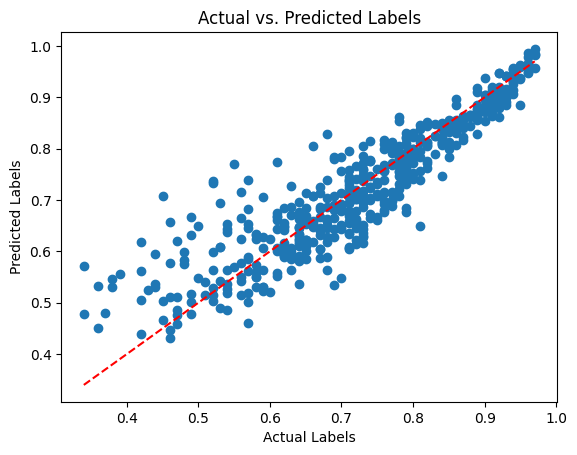

In [13]:
# prompt: Visualize the actual vs. predicted labels

import matplotlib.pyplot as plt

# Assuming y_pred contains your predicted values (from y_pred = linear_regression(x_lda_tensor))
y_pred = linear_regression(x_lda_tensor).numpy()

# Convert y_tensor to a NumPy array
y_true = y_tensor.numpy()

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_true, y_pred)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Actual vs. Predicted Labels")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--') # Add a diagonal line for comparison
plt.show()

In [14]:
# prompt: Use the LinearRegression class from Scikit-Learn to create and train the model.
#  Visualize and compare the performance.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_lda, y)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 0.0037387031882326056
R-squared: 0.8030213897591417


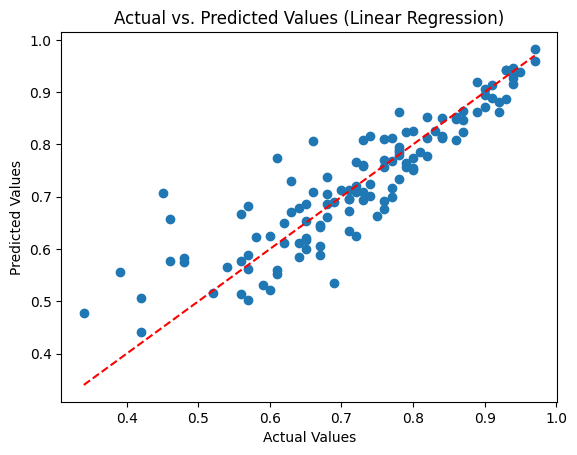

In [15]:
# Visualize the performance
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [16]:
# prompt: Implement logistic regression to predict the categorized admission chances using TensorFlow:
#  Build the model using TensorFlow and use the Softmax activation function for multi-class classification.
#  Tune the learning rate to optimize performance, evaluating the impact of different values.

# Convert y_binned to numerical labels (0, 1, 2) for multi-class classification
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_numerical = lb.fit_transform(y_binned)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_lda, y_numerical, test_size=0.2, random_state=42)

# Convert the data to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Define the logistic regression model
def logistic_regression_model(x, num_classes):
  # Define the model layers
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])
  return model

# Define the number of classes
num_classes = len(labels)

# Create the model
model_TFLOGREG = logistic_regression_model(X_train_tensor, num_classes)

# Compile the model
model_TFLOGREG.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with different learning rates
learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
  print(f"Training with learning rate: {lr}")
  model_TFLOGREG.optimizer.learning_rate = lr

  history = model_TFLOGREG.fit(X_train_tensor, y_train_tensor, epochs=100)

  # Evaluate the model on the test set
  loss, accuracy = model_TFLOGREG.evaluate(X_test_tensor, y_test_tensor, verbose=0)

  print(f"Test Loss: {loss:.4f}")
  print(f"Test Accuracy: {accuracy:.4f}")



Training with learning rate: 0.001
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6076 - loss: 1.0197
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6258 - loss: 1.0012  
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.9807 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6462 - loss: 0.9735 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 0.9520 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - loss: 0.9409 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - loss: 0.9244 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 0.9210 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - loss: 0.9035 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6834 - loss: 0.8910 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - loss: 0.8782 
Epoch 12/100
13/

**With LR = 0.001:**
Test Loss: 0.8411
Test Accuracy: 0.6500


---


**With LR = 0.01:**
Test Loss: 0.4481
Test Accuracy: 0.8200


---


**With LR= 0.1:**
Test Loss: 0.4379
Test Accuracy: 0.8300



5.5 to be done.


In [17]:
# prompt: create a y_disc that converts y_numerical into 0,1,2

# Assuming y_binned contains your binned labels ('Low', 'Medium', 'High')
y_disc = y_binned.map({'Low': 0, 'Medium': 1, 'High': 2})

print(y_disc)

0      2
1      1
2      1
3      2
4      0
      ..
495    2
496    2
497    2
498    1
499    2
Name: Chance, Length: 500, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize the scikit-learn model
log_reg = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x_lda, y_disc, test_size=0.2, random_state=42)

log_reg.fit(x_train, y_train)
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solver choices
    'max_iter': [100, 200, 500]  # Number of iterations
}

# Initialize GridSearchCV with the scikit-learn LogisticRegression model
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(x_lda, y_disc)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best Score: 0.7821104778395016


In [42]:
y_pred = log_reg.predict(x_test)

accuracy = log_reg.score(x_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.82


In [43]:
# prompt: Use k-fold cross-validation to evaluate the generalization of your models

from sklearn.model_selection import KFold

# Assuming x_lda and y_disc are your features and target variables
# You can replace them with your actual data

# Define the number of folds
n_splits = 5  # You can adjust this value as needed

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # Shuffle data for better randomization

# Initialize lists to store model performance metrics for each fold
accuracy_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(x_lda):
  # Split data into training and testing sets for the current fold
  x_train_fold, x_test_fold = x_lda[train_index], x_lda[test_index]
  y_train_fold, y_test_fold = y_disc[train_index], y_disc[test_index]

  # Initialize and train your model (e.g., Logistic Regression)
  log_reg_fold = LogisticRegression()
  log_reg_fold.fit(x_train_fold, y_train_fold)

  # Make predictions on the test set for the current fold
  y_pred_fold = log_reg_fold.predict(x_test_fold)

  # Calculate accuracy for the current fold
  accuracy_fold = log_reg_fold.score(x_test_fold, y_test_fold)
  accuracy_scores.append(accuracy_fold)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)

print(f"Average Accuracy across {n_splits} folds: {average_accuracy}")

# You can also calculate other performance metrics (e.g., precision, recall, F1-score)
# for each fold and then average them across all folds to get an overall estimate
# of your model's generalization performance.

Average Accuracy across 5 folds: 0.798


In [44]:
# prompt: Report model performance metrics including accuracy, precision, recall, F1-score, and AUC-ROC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming y_test and y_pred are your true and predicted labels
# You can replace them with your actual data

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Choose appropriate average method
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Choose appropriate average method
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average method
print(f"F1-score: {f1}")

# Calculate AUC-ROC (if your model provides probability scores)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = log_reg.predict_proba(x_test)  # Assuming your model has predict_proba method

if y_pred_prob.shape[1] > 1:  # Only calculate AUC-ROC if it's a multi-class problem
    auc_roc = roc_auc_score(y_test_bin, y_pred_prob, average='weighted', multi_class='ovr')  # Choose appropriate average and multi_class method
    print(f"AUC-ROC: {auc_roc}")
else:
    print("AUC-ROC is not applicable for binary classification.")

Accuracy: 0.82
Precision: 0.8173305637015315
Recall: 0.82
F1-score: 0.8170438222555673
AUC-ROC: 0.9299557387057387
